In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib notebook
%autosave 0
 
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import phuzzy as ph
import phuzzy.mpl as phm
import phuzzy.mpl.plots

Autosave disabled


# Sample points according membership function

True

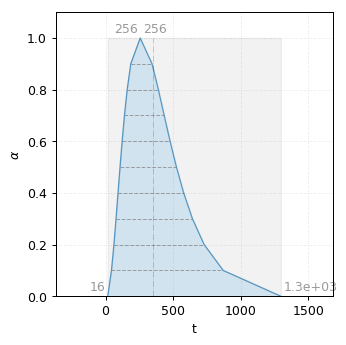

In [2]:
t = phm.TruncNorm(alpha0=[2,6], alpha1=[3])**4
t.name="t"
phm.mix_mpl(t)
t.plot()

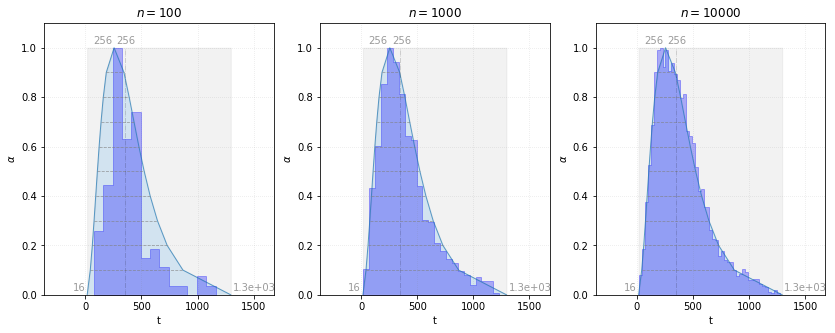

In [3]:
xp = t.rvs(1000, seed=-1)
ns = [1e2, 1e3, 1e4]
fig, axs = plt.subplots(1, len(ns), sharex=True, figsize=(14,5))
for i, n in enumerate(ns):
    n = int(n)
    axs[i].set_title(r"$n={}$".format(n))
    xp = t.rvs(int(n), seed=123)
    t.plot(ax=axs[i])
    _ = phuzzy.mpl.plots.plot_hist(xp, ax=axs[i], normed=True, color="b", filled=True, alpha=.3)

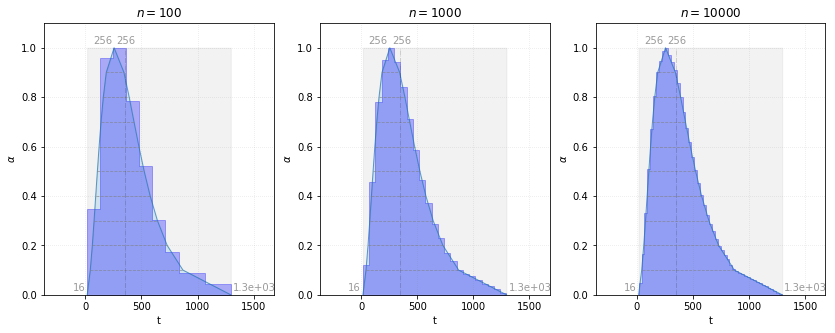

In [4]:
ns = [1e2, 1e3, 1e4]
fig, axs = plt.subplots(1, len(ns), sharex=True, figsize=(14,5))
for i, n in enumerate(ns):
    n = int(n)
    axs[i].set_title(r"$n={}$".format(n))
    xp = t.rvs(int(n), seed=-123)
    t.plot(ax=axs[i])
    _ = phuzzy.mpl.plots.plot_hist(xp, ax=axs[i], normed=True, color="b", filled=True, alpha=.3)

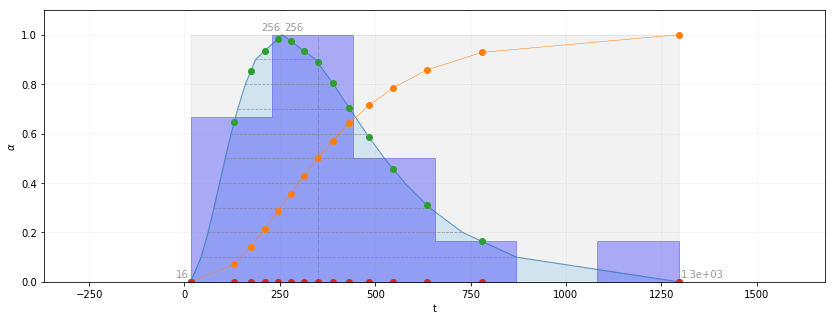

In [5]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14,5))
xp = t.rvs(15, seed=-123)
_ = t.plot(ax=ax)
_ = phuzzy.mpl.plots.plot_hist(xp, ax=ax, normed=True, color="b", filled=True, alpha=.3)
_ = ax.plot(xp, t.cdf(xp), marker="o", lw=0.5)
_ = ax.plot(xp, t.get_alpha_from_value(xp), marker="o", lw=0)
_ = ax.plot(xp, np.zeros_like(xp), marker="o", lw=0)

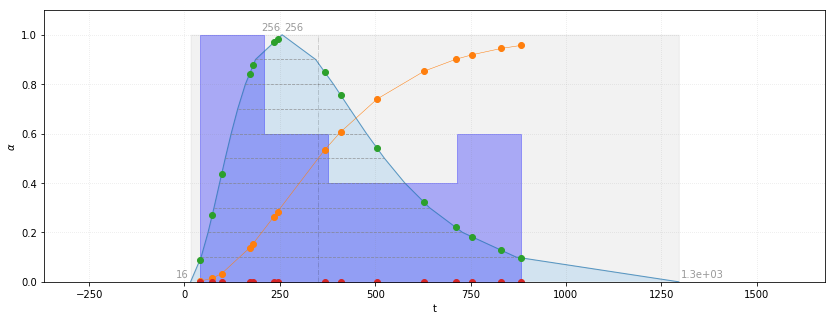

In [6]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14,5))
xp = t.rvs(15, seed=12)
xp.sort()
_ = t.plot(ax=ax)
_ = phuzzy.mpl.plots.plot_hist(xp, ax=ax, normed=True, color="b", filled=True, alpha=.3)
_ = ax.plot(xp, t.cdf(xp), marker="o", lw=0.5)
_ = ax.plot(xp, t.get_alpha_from_value(xp), marker="o", lw=0)
_ = ax.plot(xp, np.zeros_like(xp), marker="o", lw=0)

In [7]:
? t.rvs